<a href="https://www.kaggle.com/code/pranavkode142001/ml-wine-quality?scriptVersionId=292412472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequalityred/winequality-red.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit


In [3]:
data_url = '/kaggle/input/winequalityred/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
features_list = data.columns.tolist()
print(features_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

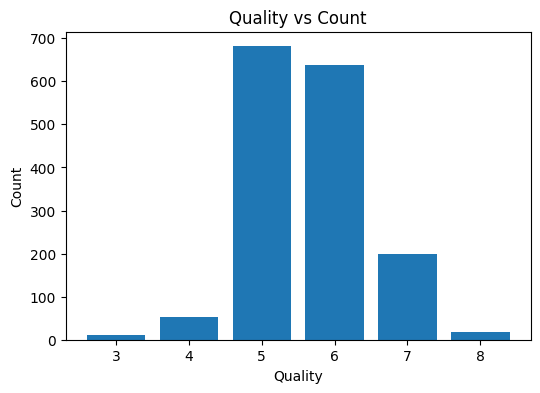

In [10]:
counts = data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

In [11]:
simple_train_data = data[:1200]
simple_test_data = data[1201:]


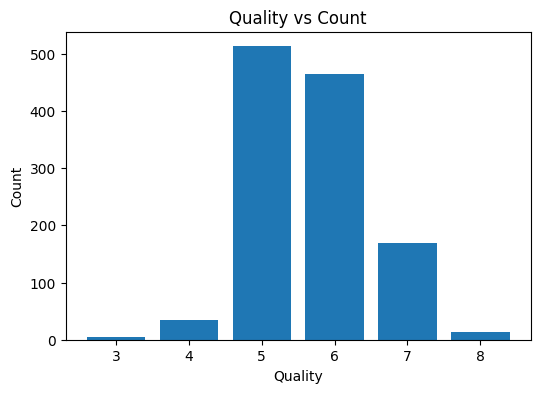

In [12]:
counts = simple_train_data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

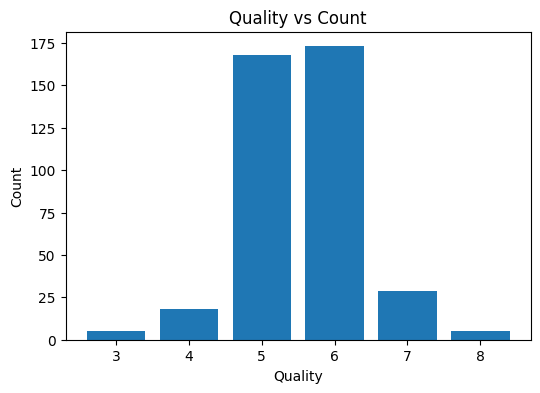

In [13]:
counts = simple_test_data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

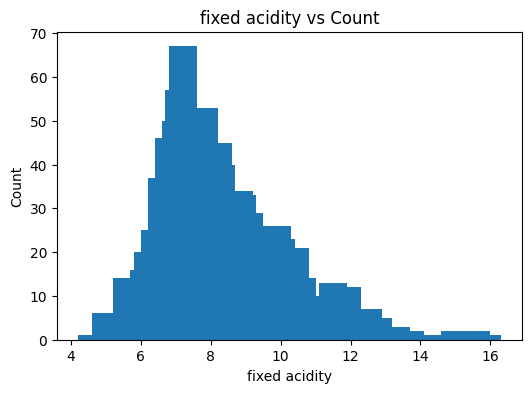

In [14]:
counts = data[features_list[0]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[0])
plt.ylabel("Count")
plt.title(f"{features_list[0]} vs Count")
plt.show()

volatile acidity
0.120     3
0.160     2
0.180    10
0.190     2
0.200     3
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 143, dtype: int64


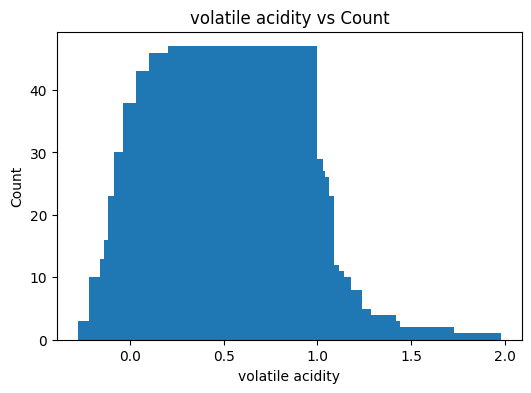

In [15]:
counts = data[features_list[1]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[1])
plt.ylabel("Count")
plt.title(f"{features_list[1]} vs Count")
plt.show()

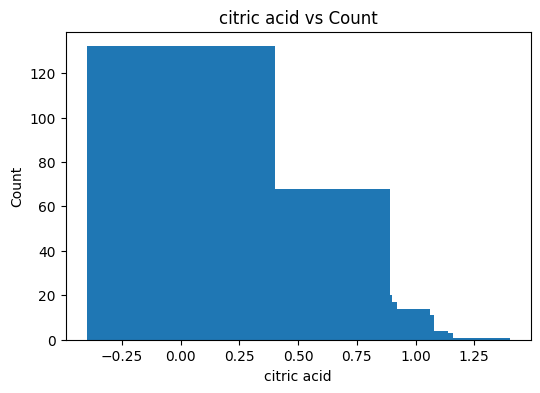

In [16]:
counts = data[features_list[2]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[2])
plt.ylabel("Count")
plt.title(f"{features_list[2]} vs Count")
plt.show()

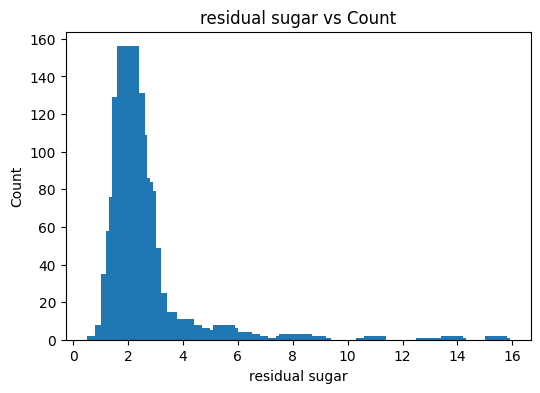

In [17]:
counts = data[features_list[3]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[3])
plt.ylabel("Count")
plt.title(f"{features_list[3]} vs Count")
plt.show()

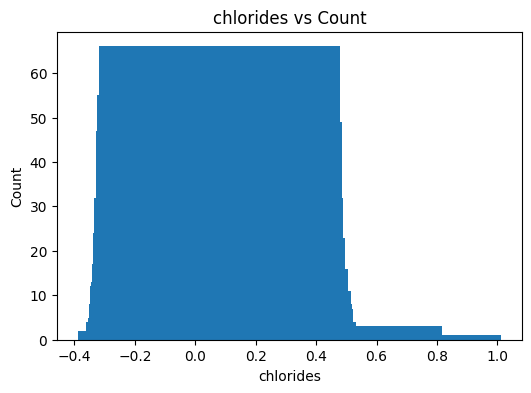

In [18]:
counts = data[features_list[4]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[4])
plt.ylabel("Count")
plt.title(f"{features_list[4]} vs Count")
plt.show()

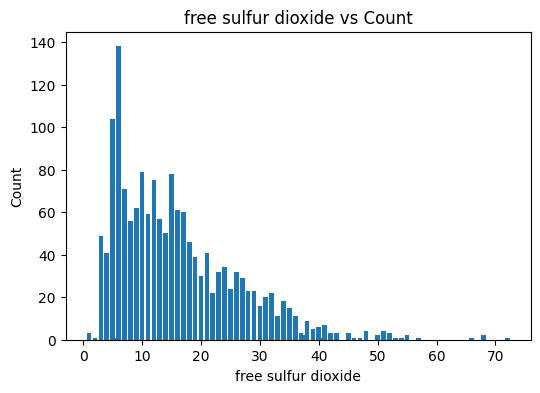

In [19]:
counts = data[features_list[5]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[5])
plt.ylabel("Count")
plt.title(f"{features_list[5]} vs Count")
plt.show()

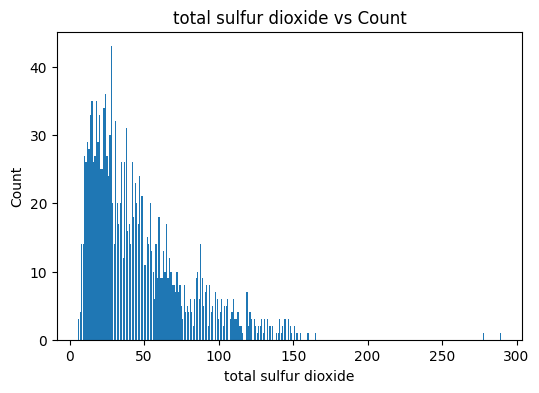

In [20]:
counts = data[features_list[6]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[6])
plt.ylabel("Count")
plt.title(f"{features_list[6]} vs Count")
plt.show()

density
0.99007    2
0.99020    1
0.99064    2
0.99080    1
0.99084    1
          ..
1.00260    2
1.00289    1
1.00315    3
1.00320    1
1.00369    2
Name: count, Length: 436, dtype: int64


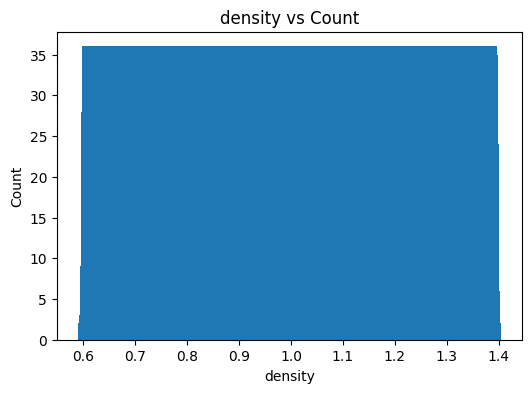

In [21]:
counts = data[features_list[7]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[7])
plt.ylabel("Count")
plt.title(f"{features_list[7]} vs Count")
plt.show()


In [22]:
def split_train_test(data, test_ratio):
# set the random seed.
    np.random.seed(42)

    # shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    
    # calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)
    
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
own_train_data,own_test_data = split_train_test(data,0.2)

In [24]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [25]:
 split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 for train_index, test_index in split.split(data, data["quality"]):
   strat_train_set = data.loc[train_index]
   strat_test_set = data.loc[test_index]

In [26]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

overall_dist = data["quality"].value_counts() / len(data)

quality
3      8
4     42
5    545
6    510
7    159
8     15
Name: count, dtype: int64


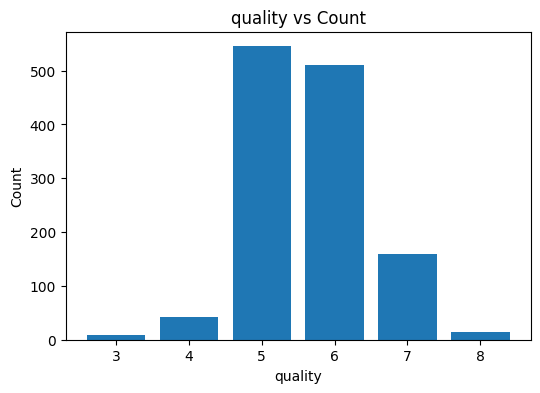

In [27]:
counts = strat_train_set[features_list[11]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[11])
plt.ylabel("Count")
plt.title(f"{features_list[11]} vs Count")
plt.show()


In [28]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)'])/dist_comparison['overall']

print(dist_comparison)

          overall  stratified  diff(s-o)  diff(s-o)_pct
quality                                                
5        0.425891    0.425000  -0.000891      -0.209251
6        0.398999    0.400000   0.001001       0.250784
7        0.124453    0.125000   0.000547       0.439698
4        0.033146    0.034375   0.001229       3.708726
8        0.011257    0.009375  -0.001882     -16.718750
3        0.006254    0.006250  -0.000004      -0.062500


In [29]:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist


quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [30]:

simple_dist = simple_test_data["quality"].value_counts() / len(simple_test_data)
simple_dist

quality
6    0.434673
5    0.422111
7    0.072864
4    0.045226
8    0.012563
3    0.012563
Name: count, dtype: float64

In [31]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist,'random':random_dist,'simple':simple_dist})
dist_comparison

,overall,stratified,random,simple
quality,,,,
3,0.006254,0.006250,0.003125,0.012563
4,0.033146,0.034375,0.031250,0.045226
5,0.425891,0.425000,0.406250,0.422111
6,0.398999,0.400000,0.412500,0.434673
7,0.124453,0.125000,0.131250,0.072864
8,0.011257,0.009375,0.015625,0.012563


In [32]:
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)'])/dist_comparison['overall']

dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)'])/dist_comparison['overall']

dist_comparison['diff(sim-o)'] = dist_comparison['simple'] - dist_comparison['overall']
dist_comparison['diff(sim-o)_pct'] = 100*(dist_comparison['diff(sim-o)'])/dist_comparison['overall']

dist_comparison

,overall,stratified,random,simple,diff(r-o),diff(r-o)_pct,diff(s-o),diff(s-o)_pct,diff(sim-o),diff(sim-o)_pct
quality,,,,,,,,,,
3,0.006254,0.006250,0.003125,0.012563,-0.003129,-50.031250,-0.000004,-0.062500,0.006309,100.879397
4,0.033146,0.034375,0.031250,0.045226,-0.001896,-5.719340,0.001229,3.708726,0.012080,36.446383
5,0.425891,0.425000,0.406250,0.422111,-0.019641,-4.611784,-0.000891,-0.209251,-0.003781,-0.887698
6,0.398999,0.400000,0.412500,0.434673,0.013501,3.383621,0.001001,0.250784,0.035674,8.940864
7,0.124453,0.125000,0.131250,0.072864,0.006797,5.461683,0.000547,0.439698,-0.051588,-41.452236
8,0.011257,0.009375,0.015625,0.012563,0.004368,38.802083,-0.001882,-16.718750,0.001306,11.599665
